In [48]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [49]:
os.chdir('D:\\R Studio')

In [12]:
pip install arch

  Obtaining dependency information for arch from https://files.pythonhosted.org/packages/37/08/acd7fbc1e15b4701b5be3acd6fd575865a274885ea6bc72ec7af909cc7e5/arch-7.0.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/924.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/924.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/924.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/924.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/924.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/924.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/924.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/924.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/924.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/924.9 kB ? eta -:--:--
   ---------------------------------------- 10.2/924.9 kB ? eta -:--:--
   -------------

# Importing the data

In [52]:
import yfinance as yf
# Get the data for tatamotors
ticker = "SUZLON.NS"  

# Download the data
data = yf.download(ticker, start="2021-04-01", end="2024-03-31")

[*********************100%%**********************]  1 of 1 completed


In [53]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 740 entries, 2021-04-01 to 2024-03-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       740 non-null    float64
 1   High       740 non-null    float64
 2   Low        740 non-null    float64
 3   Close      740 non-null    float64
 4   Adj Close  740 non-null    float64
 5   Volume     740 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 40.5 KB


In [55]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-04-01,4.591069,4.820623,4.453337,4.682891,4.682891,43011479
2021-04-05,4.682891,4.682891,4.453337,4.545159,4.545159,22124128
2021-04-06,4.545159,4.728801,4.545159,4.682891,4.682891,18657951
2021-04-07,4.774712,4.774712,4.591069,4.636980,4.636980,23653516
2021-04-08,4.728801,4.728801,4.545159,4.591069,4.591069,10129792


In [56]:
market = data["Adj Close"]
returns = 100 * data['Adj Close'].pct_change().dropna()

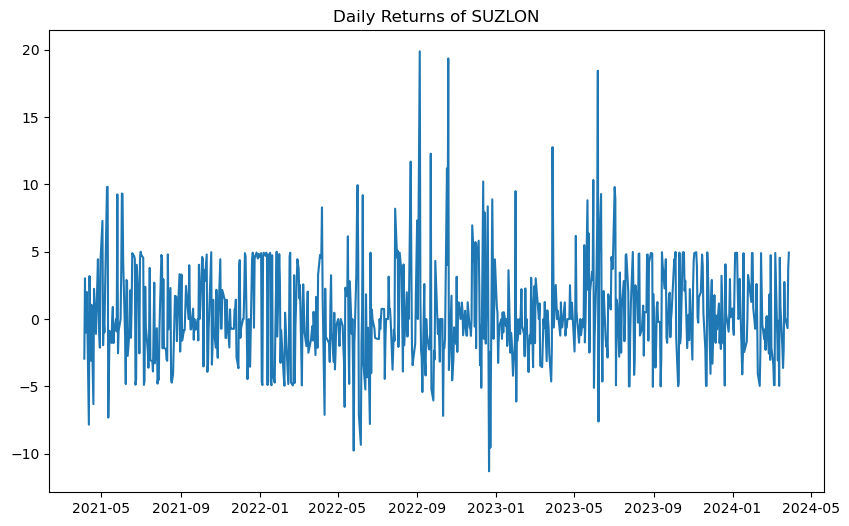

In [69]:
# Plot the returns
plt.figure(figsize=(10, 6))
plt.plot(returns)
plt.title('Daily Returns of SUZLON')
plt.show()

In [59]:
# Fit the ARCH model
model = arch_model(returns, vol='ARCH', p=1)
fitted_model = model.fit()

# Print the model summary
print(fitted_model.summary())

Iteration:      1,   Func. Count:      5,   Neg. LLF: 2481.075212505794
Iteration:      2,   Func. Count:     11,   Neg. LLF: 2053.1441265007356
Iteration:      3,   Func. Count:     17,   Neg. LLF: 2003.63363282061
Iteration:      4,   Func. Count:     21,   Neg. LLF: 2003.6267616942303
Iteration:      5,   Func. Count:     25,   Neg. LLF: 2003.62675603
Iteration:      6,   Func. Count:     28,   Neg. LLF: 2003.6267560300191
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2003.62675603
            Iterations: 6
            Function evaluations: 28
            Gradient evaluations: 6
                      Constant Mean - ARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -2003.63
Distribution:                  Normal   AIC:       

In [61]:
am = arch_model(returns, vol="Garch", p=1, o=0, q=1, dist="Normal")
res = am.fit(update_freq=5)

Iteration:      5,   Func. Count:     33,   Neg. LLF: 1983.9607645160413
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1983.9482579639368
            Iterations: 9
            Function evaluations: 53
            Gradient evaluations: 9


In [62]:
forecasts = res.forecast()

In [63]:
type(forecasts)

arch.univariate.base.ARCHModelForecast

In [64]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-21,37.000000,38.099998,36.500000,37.299999,37.299999,54916534
2024-03-22,37.000000,37.950001,36.349998,37.349998,37.349998,17891396
2024-03-26,37.500000,37.650002,36.799999,37.099998,37.099998,25064700
2024-03-27,37.400002,38.950001,37.099998,38.500000,38.500000,92336818
2024-03-28,39.000000,40.400002,38.599998,40.400002,40.400002,44688873


In [65]:
print(forecasts.mean.iloc[-3:])
print(forecasts.residual_variance.iloc[-3:])
print(forecasts.variance.iloc[-3:])

                 h.1
Date                
2024-03-28  0.275822
                  h.1
Date                 
2024-03-28  14.100549
                  h.1
Date                 
2024-03-28  14.100549


In [66]:
forecasts = res.forecast(horizon=90)
print(forecasts.residual_variance.iloc[-3:])

                 h.01       h.02       h.03       h.04       h.05       h.06  \
Date                                                                           
2024-03-28  14.100549  14.306179  14.475248  14.614257  14.728551  14.822524   

                 h.07       h.08       h.09       h.10  ...       h.81  \
Date                                                    ...              
2024-03-28  14.899788  14.963315  15.015547  15.058493  ...  15.257088   

                 h.82       h.83       h.84       h.85       h.86       h.87  \
Date                                                                           
2024-03-28  15.257088  15.257088  15.257088  15.257088  15.257088  15.257089   

                 h.88       h.89       h.90  
Date                                         
2024-03-28  15.257089  15.257089  15.257089  

[1 rows x 90 columns]


In [67]:
forecasts.residual_variance

,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10,...,h.81,h.82,h.83,h.84,h.85,h.86,h.87,h.88,h.89,h.90
Date,,,,,,,,,,,,,,,,,,,,,
2024-03-28,14.100549,14.306179,14.475248,14.614257,14.728551,14.822524,14.899788,14.963315,15.015547,15.058493,...,15.257088,15.257088,15.257088,15.257088,15.257088,15.257088,15.257089,15.257089,15.257089,15.257089


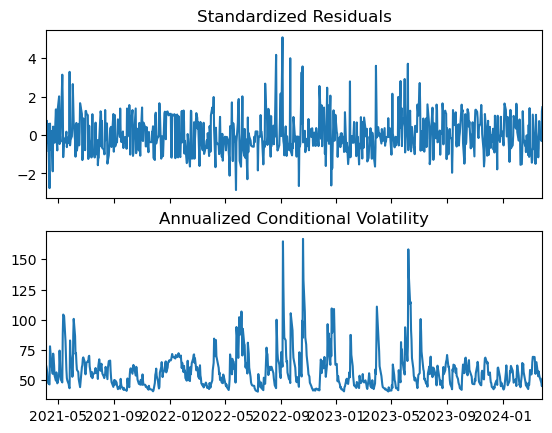

In [68]:
fig = res.plot(annualize="D")